# 4. Breast Cancer Detection

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
breast_cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [7]:
# print last 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [8]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [9]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [13]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [14]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [15]:
X.shape

(569, 30)

In [16]:
Y.shape

(569,)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


## Logistic Regression

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train, Y_train)

c:\Users\ntsur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracy)
log_train = training_data_accuracy

Accuracy on training data =  0.9428571428571428


In [22]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracy)
log_test = test_data_accuracy

Accuracy on test data =  0.9298245614035088


In [23]:
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[1]
The Breast Cancer is Benign


c:\Users\ntsur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
from sklearn.metrics import classification_report
logistic_regression_report = classification_report(Y_test, X_test_prediction)
print("Classification Report for Logistic Regression:\n", logistic_regression_report)

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        45
           1       0.94      0.94      0.94        69

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## Support Vector Machines

In [26]:
from sklearn.svm import SVC

In [27]:
# Initialize SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [28]:
# Accuracy on training data
svm_train_accuracy = svm_model.score(X_train, Y_train)
print('Accuracy on training data (SVM):', svm_train_accuracy)
svm_train = svm_train_accuracy

Accuracy on training data (SVM): 0.9692307692307692


In [29]:
# Accuracy on test data
svm_test_accuracy = svm_model.score(X_test, Y_test)
print('Accuracy on test data (SVM):', svm_test_accuracy)
svm_test = svm_test_accuracy

Accuracy on test data (SVM): 0.9473684210526315


In [30]:
# Input data for prediction
input_data = np.array([13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766,
                       0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198,
                       0.0023, 15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977,
                       0.07259]).reshape(1, -1)

# Make prediction
prediction = svm_model.predict(input_data)

# Print the prediction
if prediction[0] == 0:
    print("The tumor is Malignant.")
else:
    print("The tumor is Benign.")

The tumor is Benign.


c:\Users\ntsur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [31]:
svm_report = classification_report(Y_test, svm_model.predict(X_test))
print("Classification Report for SVM:\n", svm_report)

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        45
           1       0.96      0.96      0.96        69

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## KNN Classification

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# Create KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [34]:
# Predictions on training data
train_predictions = knn_model.predict(X_train)

# Predictions on testing data
test_predictions = knn_model.predict(X_test)


In [35]:
train_accuracy = accuracy_score(Y_train, train_predictions)
test_accuracy = accuracy_score(Y_test, test_predictions)
knn_train = train_accuracy
knn_test = test_accuracy

In [36]:
print("KNN Model - Training Accuracy:", train_accuracy)
print("KNN Model - Testing Accuracy:", test_accuracy)

KNN Model - Training Accuracy: 0.9538461538461539
KNN Model - Testing Accuracy: 0.9122807017543859


In [37]:
knn_report = classification_report(Y_test, test_predictions)
print("Classification Report for KNN:\n", knn_report)

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        45
           1       0.93      0.93      0.93        69

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



## Decision Trees

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
# Initialize Decision Trees model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
# Accuracy on training data
train_predictions = decision_tree_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_predictions)
print('Accuracy on training data:', train_accuracy)
decision_train = train_accuracy

Accuracy on training data: 1.0


In [41]:
# Accuracy on test data
test_predictions = decision_tree_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)
print('Accuracy on test data:', test_accuracy)
decision_test = test_accuracy

Accuracy on test data: 0.9122807017543859


In [42]:
input_data = np.array([13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766, 0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023, 15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259]).reshape(1, -1)
prediction = decision_tree_model.predict(input_data)
if prediction[0] == 0:
    print("The tumor is classified as Malignant")
else:
    print("The tumor is classified as Benign")

The tumor is classified as Benign


c:\Users\ntsur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [43]:
decision_tree_report = classification_report(Y_test, test_predictions)
print("Classification Report for Decision Trees:\n", decision_tree_report)

Classification Report for Decision Trees:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90        45
           1       0.97      0.88      0.92        69

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



## Randomforest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Initialize Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [46]:
# Accuracy on training data
train_predictions = random_forest_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_predictions)
print('Accuracy on training data:', train_accuracy)
randomforest_train = train_accuracy

Accuracy on training data: 1.0


In [47]:
# Accuracy on test data
test_predictions = random_forest_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)
print('Accuracy on test data:', test_accuracy)
randomforest_test = test_accuracy

Accuracy on test data: 0.9385964912280702


In [48]:
input_data = np.array([13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766, 0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023, 15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259]).reshape(1, -1)
prediction = random_forest_model.predict(input_data)
if prediction[0] == 0:
    print("The tumor is classified as Malignant")
else:
    print("The tumor is classified as Benign")

The tumor is classified as Benign


c:\Users\ntsur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
random_forest_report = classification_report(Y_test, test_predictions)
print("Classification Report for Random Forest:\n", random_forest_report)

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.96      0.94      0.95        69

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



## Neural Network

In [50]:
from sklearn.neural_network import MLPClassifier

In [51]:
# Initialize MLP classifier
mlp_classifier = MLPClassifier(random_state=42)

# Train the model
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(random_state=42)

In [52]:
# Accuracy on training data
train_predictions = mlp_classifier.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_predictions)
print('Accuracy on training data:', train_accuracy)
nn_train = train_accuracy

Accuracy on training data: 0.9406593406593406


In [53]:
# Accuracy on test data
test_predictions = mlp_classifier.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)
print('Accuracy on test data:', test_accuracy)
nn_test = test_accuracy

Accuracy on test data: 0.9298245614035088


In [54]:
input_data = np.array([13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766, 0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023, 15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259]).reshape(1, -1)
prediction = mlp_classifier.predict(input_data)
if prediction[0] == 0:
    print("The tumor is classified as Malignant")
else:
    print("The tumor is classified as Benign")

The tumor is classified as Benign


c:\Users\ntsur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [55]:
nn_report = classification_report(Y_test, test_predictions)
print("Classification Report for Neural Network:\n", nn_report)

Classification Report for Neural Network:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91        45
           1       0.97      0.91      0.94        69

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [56]:
accuracies = {
    'Logistic Regression': log_test,
    'SVM': svm_test,
    'KNN': knn_test,
    'Decision Tree': decision_test,
    'Random Forest': randomforest_test,
    'Neural Network': nn_test
}
accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
print(accuracies_df)


                 Model  Accuracy
0  Logistic Regression  0.929825
1                  SVM  0.947368
2                  KNN  0.912281
3        Decision Tree  0.912281
4        Random Forest  0.938596
5       Neural Network  0.929825


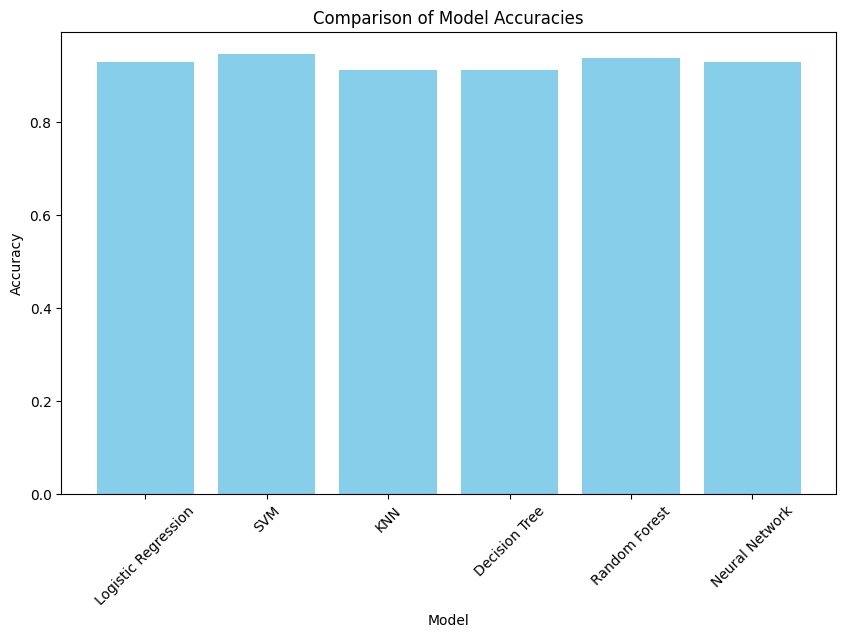

In [57]:
import matplotlib.pyplot as plt

models = list(accuracies.keys())
accuracies_values = list(accuracies.values())

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [58]:
import pickle

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)